In [59]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas
import math
import numpy as np
import lmfit
import os
from uncertainties import ufloat
import array_to_latex as atl

In [60]:
def pos(x):
    for i in range(len(data[0])):
        if data[0,i]>=x:
            return i
            break

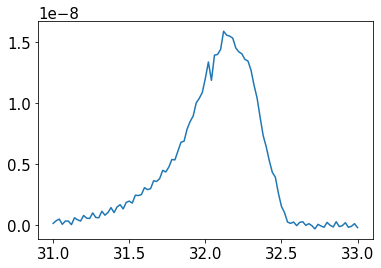

In [61]:
with open('Data/Hauptpeak Sauerstoff.csv', mode='r') as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T
        data = np.zeros((2,len(dataex[3])))
        data[0],data[1] = dataex[3],dataex[4]
plt.plot(data[0],data[1])


err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])*0.05
data = np.vstack([data,err])

In [62]:
von =31.68
bis =32.54
vonarr = pos(von)
bisarr = pos(bis)

model_gaus = lmfit.models.GaussianModel()  
pars_gaus=model_gaus.guess(data=data[1,vonarr:bisarr],x=data[0,vonarr:bisarr])

#Fitten
out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],weights=1/data[2,vonarr:bisarr],params=pars_gaus,nan_policy='propagate')


print(out_gaus.fit_report())

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 43
    # variables        = 3
    chi-square         = 854.752213
    reduced chi-square = 21.3688053
    Akaike info crit   = 134.553295
    Bayesian info crit = 139.836895
[[Variables]]
    amplitude:  7.7675e-09 +/- 2.9380e-10 (3.78%) (init = 1.027318e-08)
    center:     32.0884432 +/- 0.00686870 (0.02%) (init = 32.13)
    sigma:      0.20531459 +/- 0.00575126 (2.80%) (init = 0.23)
    fwhm:       0.48347891 +/- 0.01354318 (2.80%) == '2.3548200*sigma'
    height:     1.5093e-08 +/- 8.0358e-10 (5.32%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)    = -0.415
    C(amplitude, sigma) = -0.292


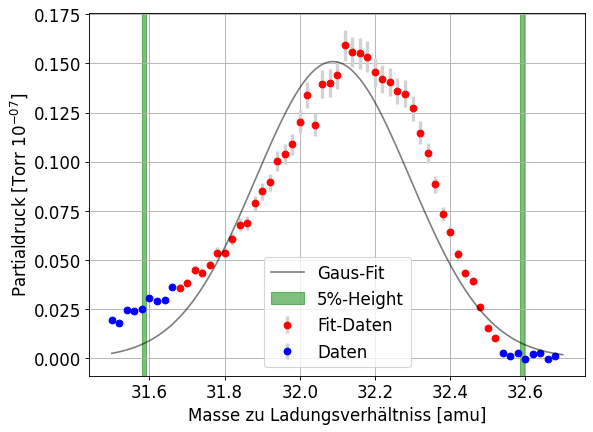

In [63]:
plt.rc ('font', size = 15) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 15) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 15) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 15) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 15) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 15) #Schriftgröße der Legende

plotv = 31.5
plotb = 32.7

five = ufloat(out_gaus.params['height'].value,out_gaus.params['height'].stderr)*0.05
fivemin = five.n-five.s
fivemax = five.n+five.s

m1=[]
for i in np.arange(30,32,0.0001):
    if fivemin <= out_gaus.eval(x=i) <= fivemax:
        m1.append(i)


m2=[]
for i in np.arange(32,33,0.0001):
    if fivemin <= out_gaus.eval(x=i) <= fivemax:
        m2.append(i)


yscale = 1e7
fig = plt.figure(figsize=(8,6),dpi=80,linewidth=50)
plt.errorbar(data[0,vonarr:bisarr],yscale*data[1,vonarr:bisarr],yerr=yscale*data[2,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Fit-Daten")
plt.errorbar(data[0,pos(plotv):vonarr],yscale*data[1,pos(plotv):vonarr],yerr=yscale*data[2,pos(plotv):vonarr],fmt='o',ecolor='lightgray',color='b', elinewidth=3, capsize=0,zorder=5,label="Daten")
plt.errorbar(data[0,bisarr:pos(plotb)],yscale*data[1,bisarr:pos(plotb)],yerr=yscale*data[2,bisarr:pos(plotb)],fmt='o',ecolor='lightgray',color='b', elinewidth=3, capsize=0,zorder=5,)
plt.plot(np.arange(plotv,plotb,0.01),yscale*out_gaus.eval(x=np.arange(plotv,plotb,0.01)),zorder=10,color='k',linestyle='-',alpha=0.5,label="Gaus-Fit")


plt.axvspan(m1[0],m1[-1],alpha=0.5,color='g',label="5%-Height")
plt.axvspan(m2[0],m2[-1],alpha=0.5,color='g')
plt.xlabel('Masse zu Ladungsverhältniss [amu]')
plt.ylabel('Partialdruck [Torr $10^{'+str(1/yscale).split("e")[1]+'}$]')
plt.grid()
plt.legend()
plt.savefig("Results/O2_auflöse.pdf")

In [64]:

pos1 = ufloat(float(np.mean([m1[-1],m1[0]])),(m1[-1]-m1[0])/2)
pos2 = ufloat(float(np.mean([m2[-1],m2[0]])),(m2[-1]-m2[0])/2)

print(pos1.format(":1.5"))
print(pos2.format(":1.5"))
deltam = pos2-pos1
print(deltam.format(":1.5"))

31.586+/-0.004
32.591+/-0.004
1.0053+/-0.0062
